In [1]:
ls


total 1376
-rwxrwxrwx@ 1 chengjun  staff  127914 May  2 15:29 data-cleaning.ipynb*
-rwxrwxrwx@ 1 chengjun  staff    2262 Apr 24 23:07 figure2.do*
-rwxrwxrwx@ 1 chengjun  staff    3538 Apr 24 23:07 figure4.do*
-rwxrwxrwx@ 1 chengjun  staff    2070 Apr 24 23:07 figureA1.do*
-rwxrwxrwx@ 1 chengjun  staff    6788 Apr 24 23:07 figureA2.do*
-rwxrwxrwx@ 1 chengjun  staff    5160 Apr 24 23:07 figureA3.do*
-rwxrwxrwx@ 1 chengjun  staff    3409 Apr 24 23:07 figureA4.do*
-rwxrwxrwx@ 1 chengjun  staff    2904 Apr 24 23:07 figureA5.do*
-rwxrwxrwx@ 1 chengjun  staff    5175 Apr 24 23:07 figureA6.do*
-rwxrwxrwx@ 1 chengjun  staff    3463 Apr 24 23:07 figureA7.do*
-rwxrwxrwx@ 1 chengjun  staff    2303 Apr 24 23:07 figureC4b.do*
-rwxrwxrwx@ 1 chengjun  staff    2470 Apr 24 23:07 figureC6b.do*
-rwxrwxrwx@ 1 chengjun  staff     732 Apr 24 23:07 generalnotes.do*
-rwxrwxrwx@ 1 chengjun  staff    4953 Apr 24 23:07 generalsetup.do*
-rwxrwxrwx@ 1 chengjun  staff    5150 Apr 24 23:07 table1.do*
-rwxrwxrwx@ 1 

In [2]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1/Program


In [3]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1


In [3]:
sysdir

   STATA:  /Applications/Stata/
    BASE:  /Applications/Stata/ado/base/
    SITE:  /Applications/Stata/ado/site/
    PLUS:  /Users/chengjun/Library/Application Support/Stata/ado/plus/
PERSONAL:  /Users/chengjun/Documents/Stata/ado/personal/
OLDPLACE:  ~/ado/


In [4]:
adopath

  [1]              "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [2]  (BASE)      "/Applications/Stata/ado/base/"
  [3]  (SITE)      "/Applications/Stata/ado/site/"
  [4]              "."
  [5]  (PERSONAL)  "/Users/chengjun/Documents/Stata/ado/personal/"
  [6]  (PLUS)      "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [7]  (OLDPLACE)  "~/ado/"
  [8]              "/opt/anaconda3/lib/python3.8/site-packages/stata_kernel/ado"


In [1]:
adopath ++ "/Users/chengjun/Library/Application Support/Stata/ado/plus/"

sysuse auto, clear
reghdfe price weight length, absorb(rep78)


  [1]              "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [2]  (BASE)      "/Applications/Stata/ado/base/"
  [3]  (SITE)      "/Applications/Stata/ado/site/"
  [4]              "."
  [5]  (PERSONAL)  "/Users/chengjun/Documents/Stata/ado/personal/"
  [6]  (PLUS)      "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [7]  (OLDPLACE)  "~/ado/"
  [8]              "/opt/anaconda3/lib/python3.8/site-packages/stata_kernel/ado"

(1978 automobile data)

(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =         69
Absorbing 1 HDFE group                            F(   2,     62) =      22.98
                                                  Prob > F        =     0.0000
                                                  R-squared       =     0.4341
                                                  Adj R-squared   =     0.3793
                                                  Within R-sq.    =     

In [12]:
**************************************************************************
*** Set up
**************************************************************************
use "Data/Final/rebellion.dta", clear
run "Program/Analysis/generalsetup.do"

In [13]:
**************************************************************************
*** Table3. Canal closure and rebellions: baseline estimates
**************************************************************************
reghdfe $Y $X, absorb(i.OBJECTID i.year) cluster(OBJECTID)
eststo est1
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est1
estadd scalar N_g=groups:est1



(MWFE estimator converged in 2 iterations)

HDFE Linear regression                            Number of obs   =    140,432
Absorbing 2 HDFE groups                           F(   1,    535) =       5.23
Statistics robust to heteroskedasticity           Prob > F        =     0.0226
                                                  R-squared       =     0.0308
                                                  Adj R-squared   =     0.0253
                                                  Within R-sq.    =     0.0002
Number of clusters (OBJECTID) =        536        Root MSE        =     0.3848

                             (Std. err. adjusted for 536 clusters in OBJECTID)
------------------------------------------------------------------------------
             |               Robust
ash~ypop1600 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0380143    .016621     2.29   0

In [28]:
esttab est1


----------------------------
                      (1)   
             ash~ypop1600   
----------------------------
interaction1       0.0380*  
                   (2.29)   

_cons              0.0313***
                  (43.35)   

0.OBJECTID              0   
                      (.)   

0.year                  0   
                      (.)   
----------------------------
N                  140432   
----------------------------
t statistics in parentheses
* p<0.05, ** p<0.01, *** p<0.001


In [14]:
reghdfe $Y $X, absorb(i.OBJECTID i.year c.ashprerebels#i.year) cluster(OBJECTID)
eststo est2
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est2
estadd scalar N_g=groups:est2


(MWFE estimator converged in 3 iterations)

HDFE Linear regression                            Number of obs   =    140,432
Absorbing 3 HDFE groups                           F(   1,    535) =       4.62
Statistics robust to heteroskedasticity           Prob > F        =     0.0321
                                                  R-squared       =     0.0395
                                                  Adj R-squared   =     0.0322
                                                  Within R-sq.    =     0.0002
Number of clusters (OBJECTID) =        536        Root MSE        =     0.3834

                             (Std. err. adjusted for 536 clusters in OBJECTID)
------------------------------------------------------------------------------
             |               Robust
ash~ypop1600 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0368671   .0171607     2.15   0

In [15]:
reghdfe $Y $X, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year) cluster(OBJECTID)
eststo est3
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est3
estadd scalar N_g=groups:est3


(MWFE estimator converged in 3 iterations)

HDFE Linear regression                            Number of obs   =    140,432
Absorbing 4 HDFE groups                           F(   1,    535) =       6.90
Statistics robust to heteroskedasticity           Prob > F        =     0.0088
                                                  R-squared       =     0.0632
                                                  Adj R-squared   =     0.0471
                                                  Within R-sq.    =     0.0003
Number of clusters (OBJECTID) =        536        Root MSE        =     0.3805

                             (Std. err. adjusted for 536 clusters in OBJECTID)
------------------------------------------------------------------------------
             |               Robust
ash~ypop1600 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0453479   .0172577     2.63   0

In [16]:
reghdfe $Y $X, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) cluster(OBJECTID)
eststo est4
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est4
estadd scalar N_g=groups:est4


(MWFE estimator converged in 7 iterations)

HDFE Linear regression                            Number of obs   =    140,432
Absorbing 5 HDFE groups                           F(   1,    535) =       6.17
Statistics robust to heteroskedasticity           Prob > F        =     0.0133
                                                  R-squared       =     0.0663
                                                  Adj R-squared   =     0.0497
                                                  Within R-sq.    =     0.0002
Number of clusters (OBJECTID) =        536        Root MSE        =     0.3799

                             (Std. err. adjusted for 536 clusters in OBJECTID)
------------------------------------------------------------------------------
             |               Robust
ash~ypop1600 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0426956   .0171928     2.48   0

In [17]:
reghdfe $Y $X $ctrls, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) cluster(OBJECTID)
eststo est5
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est5
estadd scalar N_g=groups:est5


(MWFE estimator converged in 8 iterations)

HDFE Linear regression                            Number of obs   =    140,432
Absorbing 5 HDFE groups                           F(  16,    535) =       5.35
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.0675
                                                  Adj R-squared   =     0.0509
                                                  Within R-sq.    =     0.0015
Number of clusters (OBJECTID) =        536        Root MSE        =     0.3797

                              (Std. err. adjusted for 536 clusters in OBJECTID)
-------------------------------------------------------------------------------
              |               Robust
ashonset_c~00 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
 interaction1 |   .0340131   .0165679     2.

## *** Get indicators of FEs

In [18]:
*** Get indicators of FEs
estfe est1 est2 est3 est4 est5


## *** Get Conley standard errors

In [19]:
*** Get Conley standard errors
preserve
hdfe $Y $X, clear absorb(i.OBJECTID i.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $X, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V))
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est1 
restore



(cachevars: year OBJECTID)
(converged in 3 iterations)

 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 500 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0380143   .0164542     2.31   0.021     .0057644    .0702642
------------------------------------------------------------------------------
 
STANDARD ERRORS UNDER OLS, WITH SPATIAL CORRECTION AND WITH SPATIAL AND SERIAL C
> ORRECTION:

-----------------------------------------------
    Variable |   OLS      spatial    spatHAC   
-------------+---------------------------------
interaction1 |

In [20]:
preserve
hdfe $Y $X, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $X, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V))  
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est2
restore



(cachevars: year OBJECTID)
(converged in 4 iterations)

 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 500 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0368671   .0166839     2.21   0.027     .0041669    .0695672
------------------------------------------------------------------------------
 
STANDARD ERRORS UNDER OLS, WITH SPATIAL CORRECTION AND WITH SPATIAL AND SERIAL C
> ORRECTION:

-----------------------------------------------
    Variable |   OLS      spatial    spatHAC   
-------------+---------------------------------
interaction1 |

In [21]:
preserve
hdfe $Y $X, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $X, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V)) 
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est3
restore



(cachevars: year OBJECTID)
(converged in 4 iterations)

 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 500 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0453479   .0167031     2.71   0.007     .0126102    .0780857
------------------------------------------------------------------------------
 
STANDARD ERRORS UNDER OLS, WITH SPATIAL CORRECTION AND WITH SPATIAL AND SERIAL C
> ORRECTION:

-----------------------------------------------
    Variable |   OLS      spatial    spatHAC   
-------------+---------------------------------
interaction1 |

In [22]:
preserve
hdfe $Y $X, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $X, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V)) 
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est4
restore



(cachevars: year OBJECTID)
(converged in 5 iterations)

 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 500 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0429421   .0168245     2.55   0.011     .0099665    .0759177
------------------------------------------------------------------------------
 
STANDARD ERRORS UNDER OLS, WITH SPATIAL CORRECTION AND WITH SPATIAL AND SERIAL C
> ORRECTION:

-----------------------------------------------
    Variable |   OLS      spatial    spatHAC   
-------------+---------------------------------
interaction1 |

In [23]:
preserve
hdfe $Y $X $ctrls, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $X, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V)) 
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est5
restore



(cachevars: year OBJECTID)
(converged in 7 iterations)

 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1
 
SPATIAL CORRELATION KERNAL CUTOFF: 500 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0429421   .0168245     2.55   0.011     .0099665    .0759177
------------------------------------------------------------------------------
 
STANDARD ERRORS UNDER OLS, WITH SPATIAL CORRECTION AND WITH SPATIAL AND SERIAL C
> ORRECTION:

-----------------------------------------------
    Variable |   OLS      spatial    spatHAC   
-------------+---------------------------------
interaction1 |

## Set up table elements for Latex

In [26]:
**************************************************************************
*** Set up table elements for Latex
**************************************************************************

*** Title
global caption "Canal closure and rebellions: baseline estimates"

*** Table head
#delimit ;
global head
    \begin{table}[htb]\centering
    \caption{$caption }  \begin{threeparttable}
	\begin{tabular}{l*{5}{c}}
	\toprule\toprule
	&\multicolumn{5}{c}{Dependent Variable: Rebellions } \\
	[.1cm]\cmidrule(lr){2-6}
	;
#delimit cr
*** Table notes
run "Program/Analysis/generalnotes.do"
global note_ctrl "The control variables include: land size (ln), terrain ruggedness, an indicator of temperature anomaly, an indicator of drought, an indicator of flooding, population density in 1600, an indicator of maize adoption, an indicator of sweetpotato adoption, an indicator of being suitable for wheat, and an indicator of being suitable for wetland rice. "
global notes "\begin{tablenotes}\footnotesize{\item \textit{Note.} $note_sample $note_dep $note_along $note_post $note_ctrl $note_std $note_conley }\end{tablenotes}"

In [27]:
**************************************************************************
*** Export Table to Latex
**************************************************************************
esttab est1 est2 est3 est4 est5 ///
	   using "Results/Tables/table3.tex", booktabs nonotes compress label nomtitles ///
                                   cells( b(fmt(4)) se(fmt(4) par(( )))  sesp(fmt(4) par([ ])  )) ///
							       collabels("",none) ///
                                   stats(depavg N N_g r2_a,fmt(4 %7.0fc 0 4) labels("Mean of the Dependent Variable" "No. of Observations" "No. of Counties" "Adjusted R-squared")) ///
								   indicate("County FE =0.OBJECTID" "Year FE=0.year" "Pre-reform rebellion $\times$ Year FE=0.year#c.ashprerebels" "Province $\times$ Year FE=0.provid#0.year"  "Prefecture Year Trend=0.prefid#c.year" "Controls $ \times $ Post=$ctrls ") ///
    							   prehead($head ) ///
                                   postfoot(\bottomrule\end{tabular}$notes\end{threeparttable}\end{table}) ///
                                   $stars ///
                                   replace


(output written to Results/Tables/table3.tex)


In [27]:
**************************************************************************
*** Export Table to Latex
**************************************************************************
esttab est1 est2 est3 est4 est5, ///
   cells( b(fmt(4)) se(fmt(4) par(( )))  sesp(fmt(4) par([ ])  )) ///
   collabels("",none) ///
   stats(depavg N N_g r2_a,fmt(4 %7.0fc 0 4) labels("Mean of the Dependent Variable" "No. of Observations" "No. of Counties" "Adjusted R-squared")) ///
   indicate("County FE =0.OBJECTID" "Year FE=0.year" "Pre-reform rebellion $\times$ Year FE=0.year#c.ashprerebels" "Province $\times$ Year FE=0.provid#0.year"  "Prefecture Year Trend=0.prefid#c.year" "Controls $ \times $ Post=$ctrls ") ///
   prehead($head ) ///
   postfoot($notes) ///
   $stars ///
   replace


(output written to Results/Tables/table3.tex)


```latex
\begin{table}[htb]\centering     \caption{Canal closure and rebellions: baseline estimates }  \begin{threeparttable}  \begin{tabular}{l*{5}{c}}  \toprule\toprule  &\multicolumn{5}{c}{Dependent Variable: Rebellions } \\  [.1cm]\cmidrule(lr){2-6} 
                &\multicolumn{1}{c}{(1)}&\multicolumn{1}{c}{(2)}&\multicolumn{1}{c}{(3)}&\multicolumn{1}{c}{(4)}&\multicolumn{1}{c}{(5)}\\
\midrule
Along Canal $ \times $ Post&   0.0380&   0.0369&   0.0453&   0.0427&   0.0340\\
                & (0.0166)& (0.0172)& (0.0173)& (0.0172)& (0.0166)\\
                & [0.0165]& [0.0167]& [0.0167]& [0.0168]& [0.0168]\\
Constant        &   0.0313&   0.0314&   0.0310&   0.0311&  -0.0268\\
                & (0.0007)& (0.0007)& (0.0008)& (0.0007)& (0.0195)\\
                &         &         &         &         &         \\
County FE       &      Yes&      Yes&      Yes&      Yes&      Yes\\
Year FE         &      Yes&      Yes&      Yes&      Yes&      Yes\\
Pre-reform rebellion $\times$ Year FE&       No&      Yes&      Yes&      Yes&      Yes\\
Province $\times$ Year FE&       No&       No&      Yes&      Yes&      Yes\\
Prefecture Year Trend&       No&       No&       No&      Yes&      Yes\\
Controls $ \times $ Post&       No&       No&       No&       No&      Yes\\
\midrule
Mean of the Dependent Variable&   0.0330&   0.0330&   0.0330&   0.0330&   0.0330\\
No. of Observations&  140,432&  140,432&  140,432&  140,432&  140,432\\
No. of Counties &      536&      536&      536&      536&      536\\
Adjusted R-squared&   0.0253&   0.0322&   0.0471&   0.0497&   0.0509\\
\bottomrule\end{tabular}\begin{tablenotes}\footnotesize{\item \textit{Note.} The sample consists of 536 counties in the six provinces around the canal from 1650 to 1911.  The dependent variable is the inverse hyperbolic sine transformation of the number of rebellions normalized by 1600 population.  $ AlongCanal $ is an indicator that equals one if the county is adjacent to the canal.  $ Post $ is an indicator that equals one in and after 1826.  The control variables include: land size (ln), terrain ruggedness, an indicator of temperature anomaly, an indicator of drought, an indicator of flooding, population density in 1600, an indicator of maize adoption, an indicator of sweetpotato adoption, an indicator of being suitable for wheat, and an indicator of being suitable for wetland rice.  Standard errors in parentheses are clustered at the county level.  Standard errors in square brackets are Conley standard errors robust for spatial correlation, assuming a cut-off window of 500 km and a serial correlation of 262 years.  }\end{tablenotes}\end{threeparttable}\end{table}
'''


## 生成的latex表格中为什么没有_cons？

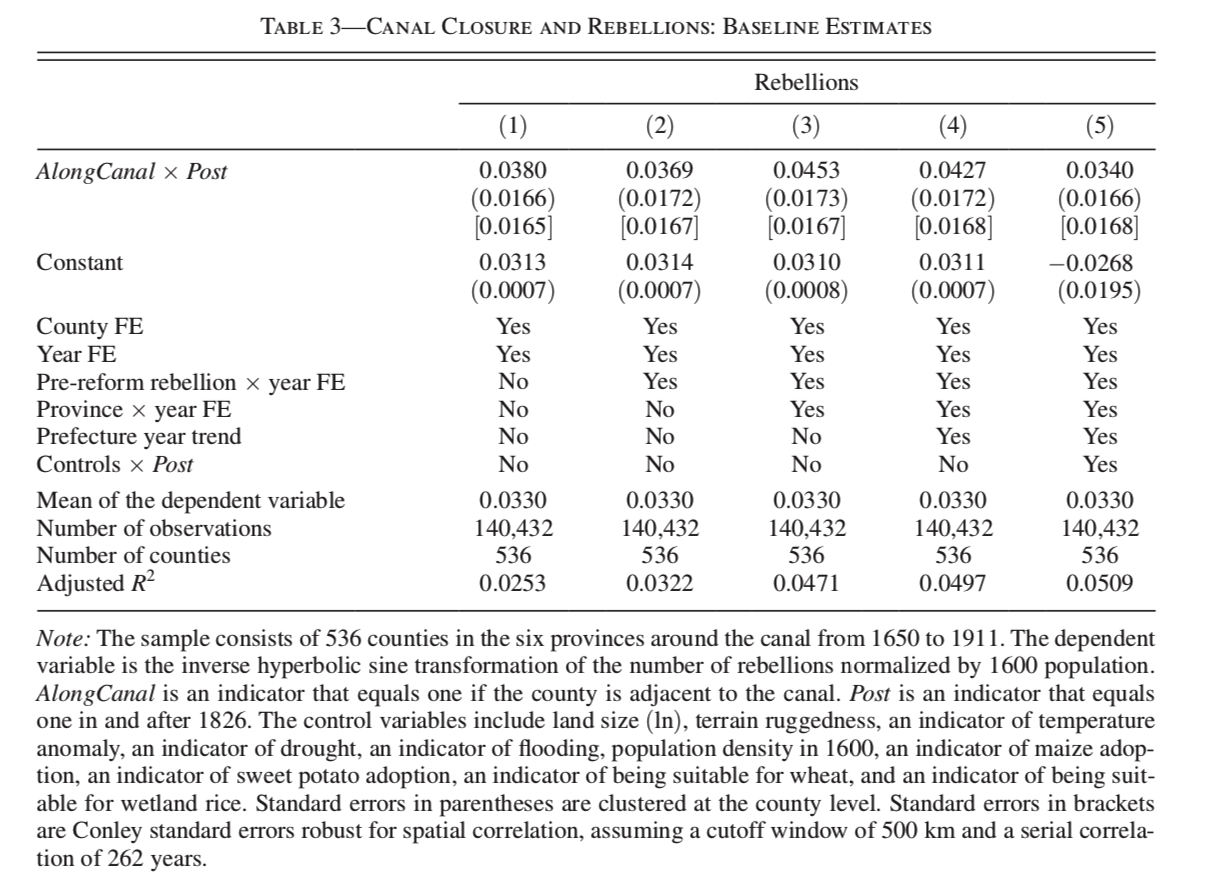